### Modeling Customer chrun data at Bank

In this project, we analyze the customer data at a bank to identify potential customer churn/attrition.

### Outline to complete this project 
(0) Import relevant libraries and import csv data using pandas library \
(1) Understand the shape/features of the data and visualize the trend using matplotlib (plots) \
(2) Data cleaning \
(3) Data exploration \
(4) Feature engineering \
(5) Data Preprocessing \
(6) Building models \
(7) Tunning model \
(8) Results and comparison 

The description of the data set columns is here: https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m

The Statistical model explored are: \
(1) LogisticRegression \
(2) DecisionTree \
(3) RandomForest \
(4) SupportVectorClassifier \
(5) KNeighborsClassifier \
(6) xGBoost

In [141]:
# we will use sci-kit learn libraries to build classical machine learning model

In [222]:
## Import relevant library and import data sets
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl

import os

def MyFont(n):
    mpl.rcParams['font.size'] = n
    mpl.rcParams['xtick.labelsize'] = n
    mpl.rcParams['ytick.labelsize'] = n

In [223]:
# Download the training data and test data from Kaggle
# Read this page to learn how to download data from Kaggle
# https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook
#Alternnatively, you can use the code below to directly download the data
#using your kaggle username and kaggle api key

import opendatasets as od
od.download("https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m")           
os.listdir('.')
os.listdir('predicting-credit-card-customer-attrition-with-m')

Skipping, found downloaded files in "./predicting-credit-card-customer-attrition-with-m" (use force=True to force download)


['BankChurners.csv']

In [224]:
#load input data train.csv and test.csv using pandas data frame
df_raw = pd.read_csv("predicting-credit-card-customer-attrition-with-m/BankChurners.csv")


In [225]:
## Get general info about the data such as different columns
print(df_raw.shape)
df_raw.head()

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [226]:
df_raw.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## Data set description:
This dataset provides customer information to predict customer attrition for a consumer credit card portfolio

CLIENTNUM: Unique identifier for each customer. (Integer) \
Attrition_Flag: Flag indicating whether or not the customer has churned out. (Boolean) \
Customer_Age: Age of customer. (Integer) \
Gender: Gender of customer. (String) \
Dependent_count: Number of dependents that customer has. (Integer) \
Education_Level: Education level of customer. (String) \
Marital_Status: Marital status of customer. (String) \
Income_Category: Income category of customer. (String) \
Card_Category: Type of card held by customer. (String) \
Months_on_book: How long customer has been on the books. (Integer) \
Total_Relationship_Count: Total number of relationships customer has with the credit card provider. (Integer) \
Months_Inactive_12_mon: Number of months customer has been inactive in the last twelve months. (Integer) \
Contacts_Count_12_mon: Number of contacts customer has had in the last twelve months. (Integer) \
Credit_Limit: Credit limit of customer. (Integer) \
Total_Revolving_Bal: Total revolving balance of customer. (Integer) \
Avg_Open_To_Buy: Average open to buy ratio of customer. (Integer) \
Total_Amt_Chng_Q4_Q1: Total amount changed from quarter 4 to quarter 1. (Integer) \
Total_Trans_Amt: Total transaction amount. (Integer) \
Total_Trans_Ct: Total transaction count. (Integer) \
Total_Ct_Chng_Q4_Q1: Total count changed from quarter 4 to quarter 1. (Integer)  \
Avg_Utilization_Ratio: Average utilization ratio of customer. (Integer)  \
Naive_Bayes_Classifier_Attrition_Flag_Card_.. \
Category_Contacts_Count_12_mon_Dependent_count_ \
Education_Level_Months_Inactive_12_mon_1: \
Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such \

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_ \
Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 \
Naive Bayes Classifier Attrition Flag Card Category Contacts \
Count 12 Mon Dependent Count Education Level Months Inactive 12 Mon 2 \


                                                                                        
                                                                                        
                                                                                    

In [227]:
# The second last column is probability that a customer will churn next month
# The last columnn represents the probability that a customer will not churn in the next months
# So we will drop one of the column, i.e. we can drop the last coloumn
# We will also drop the first columnn as it is a Identification number assigned to the customer which
# has no dependence on the customer's churn decision

df = df_raw.iloc[:,1:-1]
print(df.shape)
df.head()

(10127, 21)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022


In [228]:
#Let's rename the last column which represent probability that a customer will churn next month
LastColName = df.columns[-1]
#'Naive_Bayes_Probability'
df = df.rename(columns={LastColName:'NaiveBayesProb'})

df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NaiveBayesProb'],
      dtype='object')

In [229]:
#Check for null values
display( df.isnull().sum())
print(df.dtypes)


Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NaiveBayesProb              0
dtype: int64

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
NaiveBayesProb              float64
dtype: object


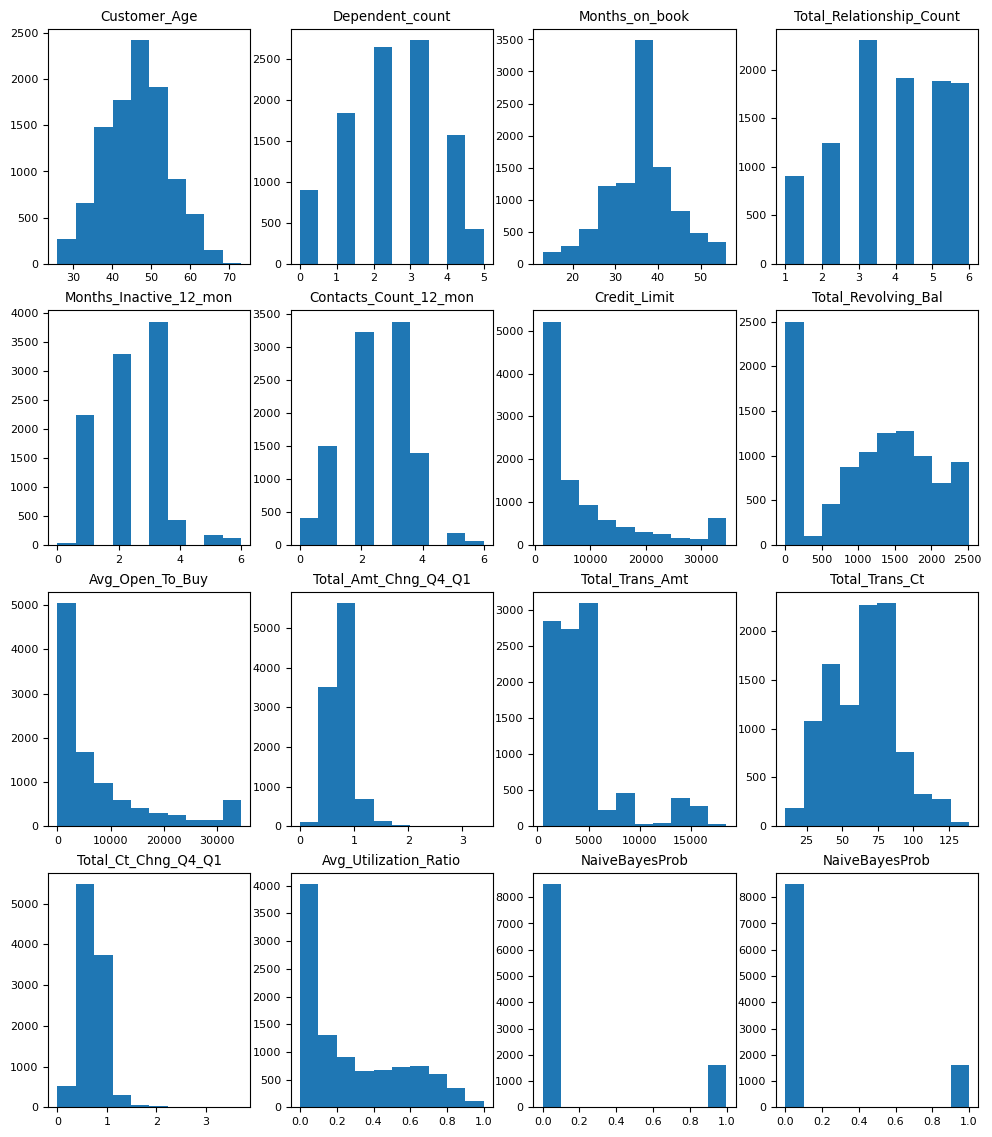

In [232]:

#Let's make 1D histogram of numeric data to see the overall distribution
# We use "hist" function for numeric data
# For categorical data, we should use "barplot" function defined in seaborn library
#print( train_pd.head())
MyFont(8)
fig, ax = plt.subplots(4,4,figsize=(12,14))
name = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','NaiveBayesProb', 
        'NaiveBayesProb']
m=0
for i in range(0,4):
    for j in range(0,4):
        # ax[0].hist(df['Age'])
        ax[i,j].hist(df[name[m]].to_numpy())
        ax[i,j].set_title(name[m]  )      
        m=m+1
plt.show() 

# (1) The data indicate that 

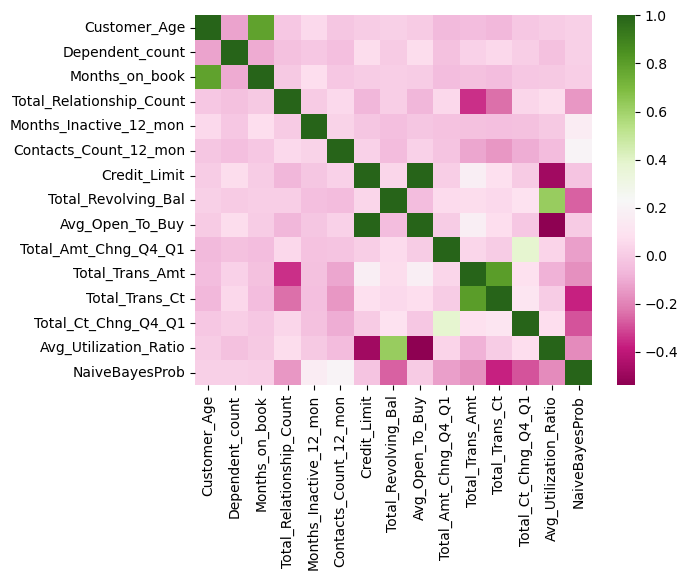

In [234]:
# To study the correlation between the two variables in the data, we can compute
# the pearson coefficient using function "corr()" defined in pandaDataFrame.
# The pearson coefficient between two variable x and y is given as a ratio of sqrt(SD(x)) to sqrt(SD(y) time slope 
#.   of the linear fit to the data formed by x and y
# Pearson coefficient is proportional to the slope and measure the strength of linear correlation
# it varies from -1 to +1.
# We use seaborn library function "heatmap" to visualize
MyFont(10)

Name = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','NaiveBayesProb']

PearsonDataMatrix = df[Name].corr()
#print(PearsonDataMatrix)
sb.heatmap(PearsonDataMatrix ,cmap="PiYG")
plt.show() 


## From the above pearson correlation plot we see that the following independent variables are highly correlated and we should choose one of them in each class
(1) Customer_Age, Months_on_book, \
(2) Total_Trans_Amt, Total_Trans_Ct, Total_Relationship_Count \
(3) Avg_Utilization_Ratio, Credit_Limit, Avg_Open_To_Buy

### We will do the analysis in two ways: keeping all the variables, removing the redundant variables

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

Index(['Existing Customer', 'Attrited Customer'], dtype='object')


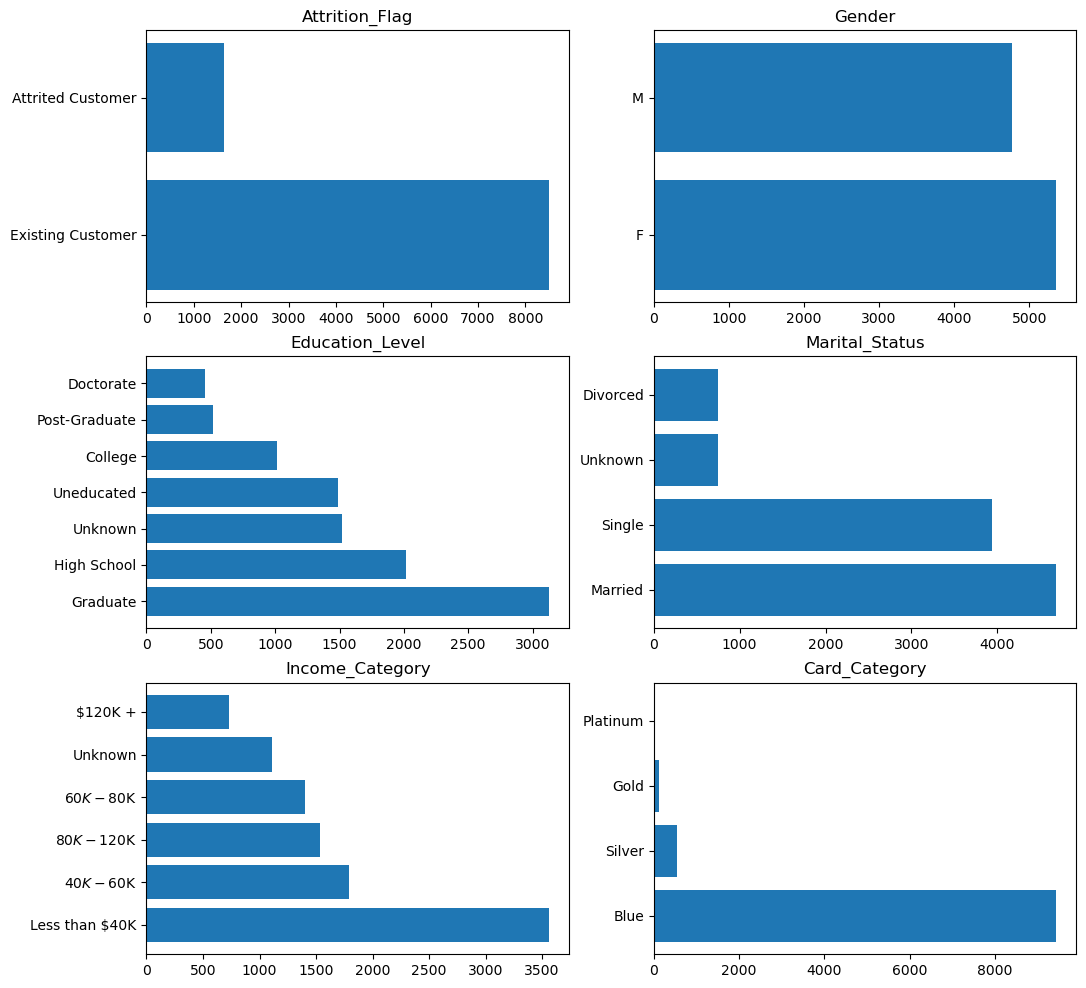

In [235]:
#Now, let's plot categorical data using matplotlib
print( df['Attrition_Flag'].value_counts() ,"\n")
print(df['Attrition_Flag'].value_counts().index )

MyFont(10)
fig, ax = plt.subplots(3,2,figsize=(12,12))
name = ['Attrition_Flag', 'Gender',  'Education_Level',  'Marital_Status',  'Income_Category', 'Card_Category']
m=0
for i in range(0,3):
    for j in range(0,2):
        ax[i,j].barh( df[name[m]].value_counts().index, df[name[m]].value_counts() )
        ax[i,j].set_title(name[m])        
        m=m+1
plt.show() 


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

Index(['Existing Customer', 'Attrited Customer'], dtype='object')


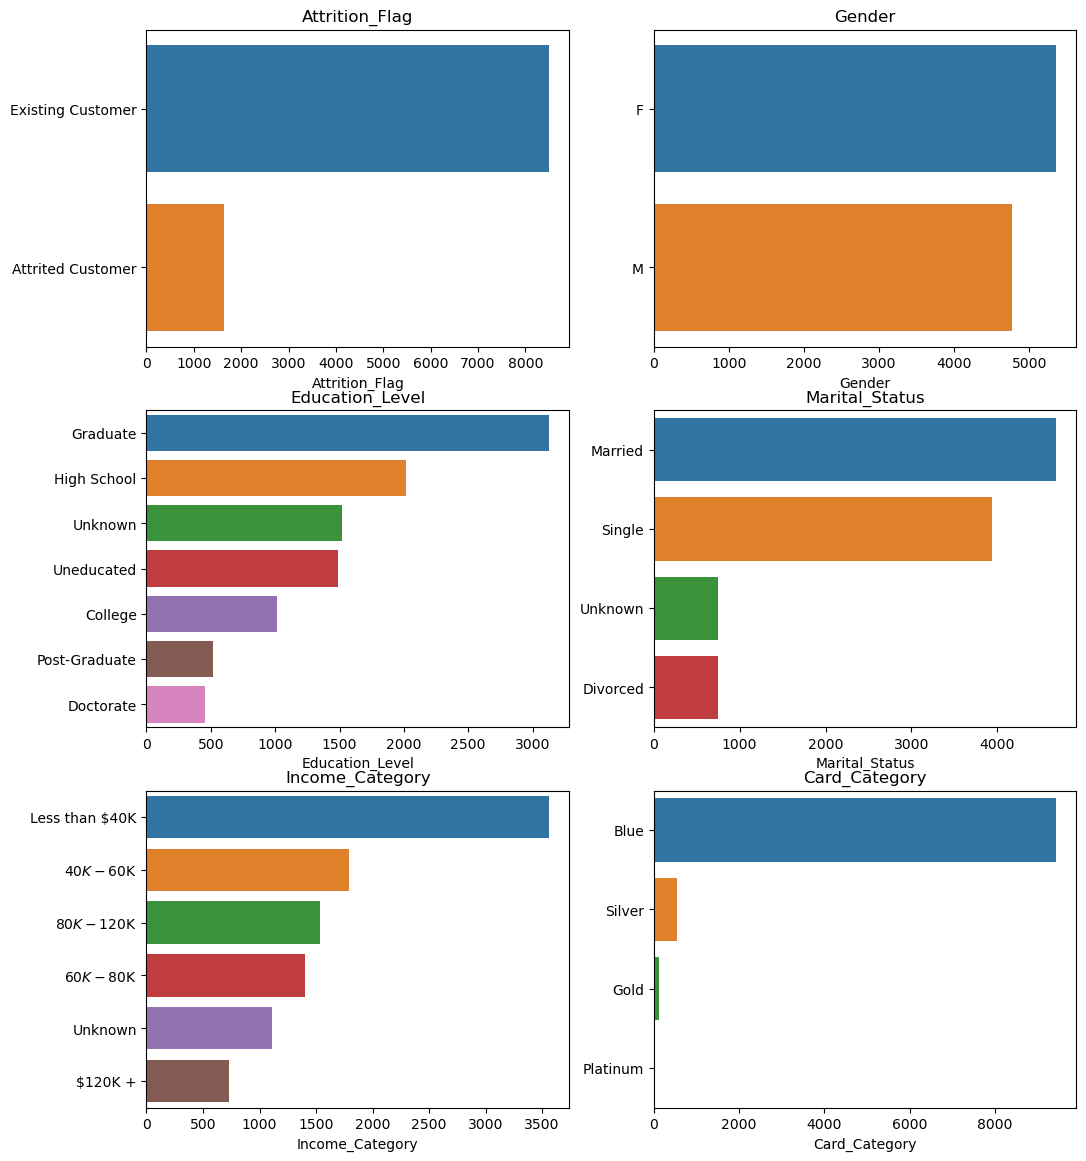

In [236]:
# Now, let's plot categorical data using seaborn library
print( df['Attrition_Flag'].value_counts() ,"\n")
print(df['Attrition_Flag'].value_counts().index )

MyFont(10)
fig, axs = plt.subplots(3,2,figsize=(12,14))
name = ['Attrition_Flag', 'Gender',  'Education_Level',  'Marital_Status',  'Income_Category', 'Card_Category']
m=0
for i in range(0,3):
    for j in range(0,2):
        #ax[i,j].barh( df[name[m]].value_counts().index, df[name[m]].value_counts() )
        sb.barplot( y=df[name[m]].value_counts().index, x=df[name[m]].value_counts(), ax=axs[i,j])
        axs[i,j].set_title(name[m])        
        m=m+1
plt.show() 
        
        

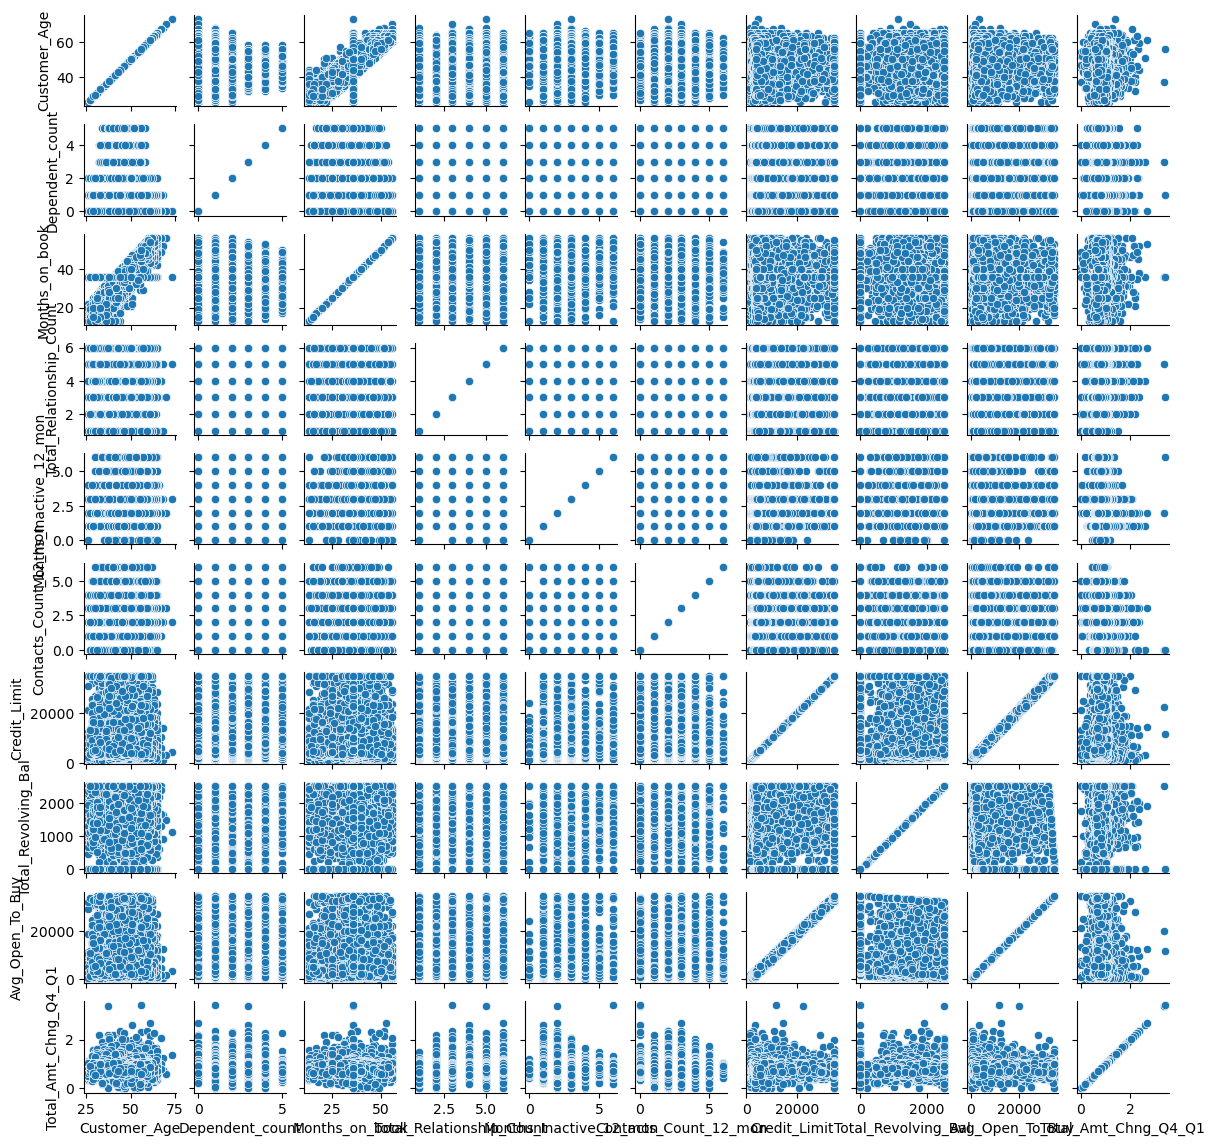

In [237]:
#Plots 
Nmax=10
fig, axs = plt.subplots(Nmax,Nmax,figsize=(14,14))
name1 = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','NaiveBayesProb']
name2 = ['Attrition_Flag', 'Gender',  'Education_Level',  'Marital_Status',  'Income_Category', 'Card_Category']
nameAll = name1 + name2
m=0

for i in range(0,Nmax):
    for j in range(0,Nmax):
        ax = sb.scatterplot( x=df[nameAll[j]],  y=df[nameAll[i]], ax=axs[i,j])
        if j != 0 and i != Nmax-1: 
            ax.set(ylabel=None)
            ax.set(xlabel=None)
            ax.set(xticklabels=[])
            ax.set(yticklabels=[])
        if j!=0 and i == Nmax-1:
            ax.set(ylabel=None)
            ax.set(yticklabels=[])
        if j==0 and i != Nmax-1:
            ax.set(xlabel=None)
            ax.set(xticklabels=[])
            #ax.set(xticklabels=True)
        ax.spines[['right', 'top']].set_visible(False)
        ax.grid(False)
        
        #sb.barplot( y=df[name[m]].value_counts().index, x=df[name[m]].value_counts(), ax=axs[i,j])
        #axs[i,j].set_title(name[m])        
        m=m+1
plt.show() 

### In the above plots, we observe that there are categorical variables which would require label encoding
### And, from Pearson correlation among numerical variables, we saw few redundant variables, which were
(1) Customer_Age, Months_on_book, \
(2) Total_Trans_Amt, Total_Trans_Ct, Total_Relationship_Count \
(3) Avg_Utilization_Ratio, Credit_Limit, Avg_Open_To_Buy 

In this analysis, we will create four different data sets using feature engineering and compute confusion matrix for each of the four data sets: \
(1) Keep all columns and perform Label encoding for categorical variables \
(2) Keep all columns and perform One Hot encoding for categorical variables to create new independent variables for each label \
(3) Remove redundant variables and perform Label encoding for categorical variables \
(4) Remove redundant variables and perform OneHot encoding for categorical variables to create new independent variables for each label \

Compute confusion matrix for each four sets of data


In [238]:
#There are six columns with "string" as a variable. We can use Labelencoder for 
#converting them into nnumerical categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

name_str = ['Attrition_Flag', 'Gender',  'Education_Level',  'Marital_Status',  'Income_Category', 'Card_Category']

for i in range(0, len(name_str)):
    print( df[name_str[i]].unique() )
    df[name_str[i] ] = encoder.fit_transform(df[name_str[i] ])
    print( df[ name_str[i] ].unique() )   

['Existing Customer' 'Attrited Customer']
[1 0]
['M' 'F']
[1 0]
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
[3 2 5 6 0 4 1]
['Married' 'Single' 'Unknown' 'Divorced']
[1 2 3 0]
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
[2 4 3 1 0 5]
['Blue' 'Gold' 'Silver' 'Platinum']
[0 1 3 2]


In [239]:
df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NaiveBayesProb
0,1,45,1,3,3,1,2,0,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,1,49,0,5,2,2,4,0,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,1,51,1,3,2,1,3,0,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,1,40,0,4,3,3,4,0,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,1,40,1,3,5,1,2,0,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022


In [240]:
from sklearn.preprocessing import OneHotEncoder

df_full = df.iloc[:,1:-1]
print(df_full.shape)
df_short = df_full.drop( columns=['Months_on_book', 'Total_Trans_Ct', 'Total_Trans_Amt', 'Avg_Utilization_Ratio'
                                  ,'Avg_Open_To_Buy'], axis=1)
print(df_short.shape)
df_full.head()
df_short.head()

EncodedString =['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
HotEncodedString =[]

df_full_ohe = df_full.drop( columns=EncodedString, axis=1)
df_short_ohe = df_short.drop( columns=EncodedString, axis=1)


for label in EncodedString:
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    ftarray =  ohe.fit_transform( df_full[[label]] ) 
    
    print(len(ftarray[0][:]))
    N=len(ftarray[0][:])
    print(N)
    stringlabel=[]
    for i in range(1,N+1):
        stringlabel.append( label+ str(i) )
    print(stringlabel)
    HotEncodedString = HotEncodedString + stringlabel
    ftPD = pd.DataFrame(ftarray, columns=stringlabel )
    
    #display(ftPD)
    df_full_ohe = df_full_ohe.join(ftPD)
    df_short_ohe = df_short_ohe.join(ftPD)
    
display(df_full_ohe)
display(df_short_ohe)


(10127, 19)
(10127, 14)
2
2
['Gender1', 'Gender2']
6
6
['Dependent_count1', 'Dependent_count2', 'Dependent_count3', 'Dependent_count4', 'Dependent_count5', 'Dependent_count6']
7
7
['Education_Level1', 'Education_Level2', 'Education_Level3', 'Education_Level4', 'Education_Level5', 'Education_Level6', 'Education_Level7']
4
4
['Marital_Status1', 'Marital_Status2', 'Marital_Status3', 'Marital_Status4']
6
6
['Income_Category1', 'Income_Category2', 'Income_Category3', 'Income_Category4', 'Income_Category5', 'Income_Category6']
4
4
['Card_Category1', 'Card_Category2', 'Card_Category3', 'Card_Category4']


,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Income_Category1,Income_Category2,Income_Category3,Income_Category4,Income_Category5,Income_Category6,Card_Category1,Card_Category2,Card_Category3,Card_Category4
0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,40,21,5,1,0,4716.0,0,4716.0,2.175,816,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,40,3,2,3,4003.0,1851,2152.0,0.703,15476,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,41,25,4,2,3,4277.0,2186,2091.0,0.804,8764,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,44,36,5,3,4,5409.0,0,5409.0,0.819,10291,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,30,36,4,3,3,5281.0,0,5281.0,0.535,8395,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Customer_Age,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Gender1,Gender2,...,Income_Category1,Income_Category2,Income_Category3,Income_Category4,Income_Category5,Income_Category6,Card_Category1,Card_Category2,Card_Category3,Card_Category4
0,45,5,1,3,12691.0,777,1.335,1.625,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,6,1,2,8256.0,864,1.541,3.714,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,51,4,1,0,3418.0,0,2.594,2.333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,3,4,1,3313.0,2517,1.405,2.333,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,40,5,1,0,4716.0,0,2.175,2.500,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,3,2,3,4003.0,1851,0.703,0.857,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,41,4,2,3,4277.0,2186,0.804,0.683,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,44,5,3,4,5409.0,0,0.819,0.818,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,30,4,3,3,5281.0,0,0.535,0.722,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [242]:
#In this dataset, we have two options to choose dependent variable Y
#i.e. "Customer attrition" column can be used as Y and also one can use "NaiveBayesProb" column
#Define x_test and y_test, we will use full training data as test set 
#We have 4 different sets of x_train, i.e df_full, df_short, df_full_ohe, df_short_ohe

X_test1 =  df_full.iloc[:,:].to_numpy()
X_test2 =  df_full_ohe.iloc[:,:].to_numpy()
X_test3 =  df_short.iloc[:,:].to_numpy()
X_test4 =  df_short_ohe.iloc[:,:].to_numpy()

y_test = df.iloc[:,-1].to_numpy()

X_train1 = X_test1[0:9000,:]
X_train2 = X_test2[0:9000,:]
X_train3 = X_test3[0:9000,:]
X_train4 = X_test4[0:9000,:]

y_train = y_test[0:9000]

print(df.iloc[:,1:-1].columns )
print(y_train)    
print(df.isnull().sum())

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
[9.3448e-05 5.6861e-05 2.1081e-05 ... 5.6153e-05 9.6126e-05 9.9161e-01]
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
T

### Numerical regression models
(1) Linear Regression \
(2) Decision Tree \
(3) Random Forest \
(4) Support Vector Regression \
(5) KNeighbors Regression  \
(6) Xtreme Gradient Boosting (xGBoost)

In [244]:
#define a function to plot 2x2 confusion matrix
def plot_confusion_matrix(cnf_mat, LabelS, cmap=plt.cm.Blues): 
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    ims = ax.imshow(cnf_mat, interpolation='nearest', cmap=cmap)
    cb = plt.colorbar(ims, ax=ax)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(LabelS))
    plt.xticks(tick_marks, LabelS, rotation=45)
    plt.yticks(tick_marks, LabelS)
    for i  in range(0,2):
        for j in range(0,2):
            plt.text(i,j,cnf_mat[i][j])
            
def plot_confusion_matrix4D(cnf_all, LabelS, cmap=plt.cm.Blues): 
    fig, ax = plt.subplots(1, 4, figsize=(20,4))
    mpl.rcParams['font.size'] = 15
    mpl.rcParams['xtick.labelsize'] = 15
    mpl.rcParams['ytick.labelsize'] = 15

    for k in range(0,4):
        cnf_mat = cnf_all[k]
        ims = ax[k].imshow(cnf_mat, interpolation='nearest', cmap=cmap)
        cb = plt.colorbar(ims, ax=ax[k])
        ax[k].set_ylabel('True label')
        ax[k].set_xlabel('Predicted label')
        for item in ([ax[k].title, ax[k].xaxis.label, ax[k].yaxis.label ] +
             ax[k].get_xticklabels() + ax[k].get_yticklabels()):
            item.set_fontsize(15)
        tick_marks = np.arange(len(LabelS))
        plt.xticks(tick_marks, LabelS, rotation=45)
        plt.yticks(tick_marks, LabelS)
        for i  in range(0,2):
            for j in range(0,2):
                ax[k].text(i,j,cnf_mat[i][j])
    plt.tight_layout()
      
#Retrive classification report and consfusion matrix
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
def EvaluateModel(y_test, y_predict):
    print( classification_report(y_test, y_predict) )
    cnf_mat = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(cnf_mat)
    plot_confusion_matrix(cnf_mat, LabelS=['Stay(0)','Leave(1)'])

def EvaluateModel4D(y_test, YP):
    cnf_mat = [[0, 0], [0, 0]]
    cnf_all = [cnf_mat, cnf_mat, cnf_mat, cnf_mat ]
    r0 = classification_report(y_test, YP[0])
    r1 = classification_report(y_test, YP[1])
    r2 = classification_report(y_test, YP[2])
    r3 = classification_report(y_test, YP[3])
    print( r0, r1, r2, r3)
    for i in range(0,4):
        cnf_all[i] = confusion_matrix(y_test, YP[i], labels=[0,1])
    print( cnf_all[0], cnf_all[1], cnf_all[2], cnf_all[3] )
    plot_confusion_matrix4D(cnf_all, LabelS=['Stay(0)','Leave(1)'])    

# Convert Continuous variable into two group based on the probability percentage
# if Y[i] > ProbCutoff , then customer would probably leave
def ConvertToDiscrete(Y,ProbCutoff):
    Ynew = np.zeros( len(Y))
    for i in range(0, len(Y) ):
        if Y[i] > ProbCutoff :
            Ynew[i] = 1 
    return Ynew

#Let's define Probability cutoff as 0.3. The customer would probably close the credit card 
#if Probability score above this cut-off number.
ProbCutoff=0.5


Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Logistic Regression 
 BestScore:  0.2001296669713875 
 Best parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      8500
         1.0       0.85      0.41      0.55      1627

    accuracy                           0.89     10127
   macro avg       0.87      0.70      0.75     10127
weighted avg       0.89      0.89      0.88     10127
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      8500
         1.0       0.85      0.42      0.56      1627

    accuracy                           0.89     10127
   macro avg       0.87      0.70      0.75     10127
weighted 

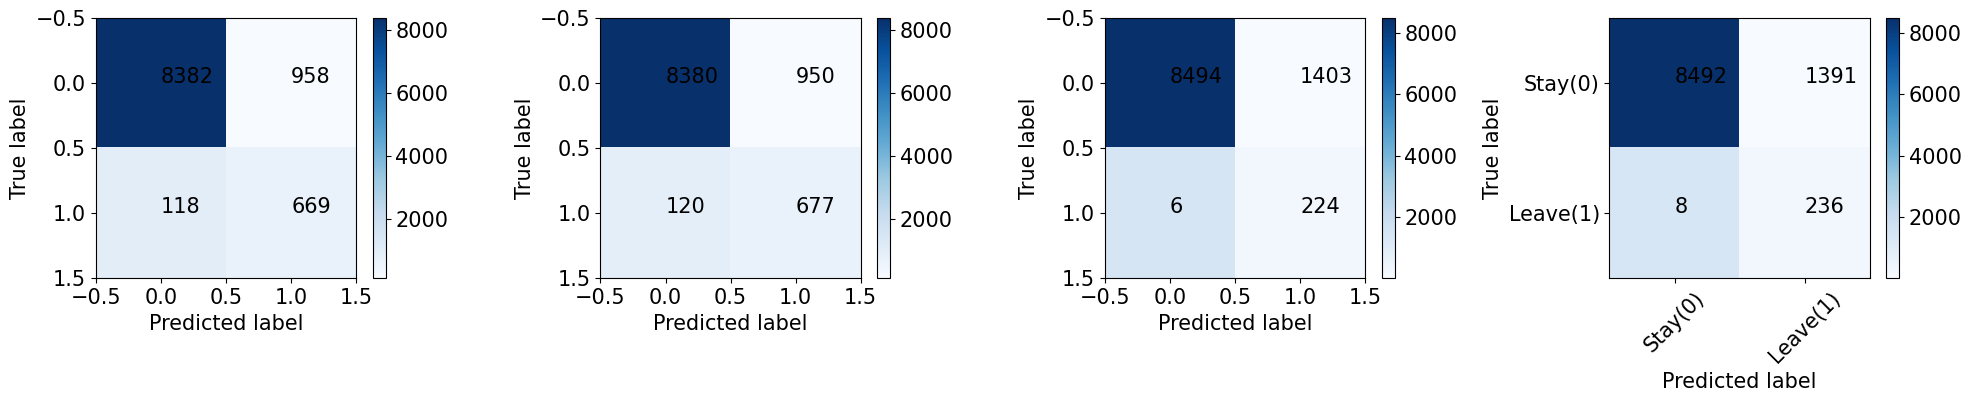

In [245]:
from sklearn.model_selection import GridSearchCV

#Use linear regression model to the data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
param_grid = {'fit_intercept':[True], 'copy_X':[True], 'n_jobs':[None], 'positive':[False]}
lr_model1 = GridSearchCV(lr, param_grid = param_grid, cv = 15, verbose = True, n_jobs = -1)
lr_model2 = GridSearchCV(lr, param_grid = param_grid, cv = 15, verbose = True, n_jobs = -1)
lr_model3 = GridSearchCV(lr, param_grid = param_grid, cv = 15, verbose = True, n_jobs = -1)
lr_model4 = GridSearchCV(lr, param_grid = param_grid, cv = 15, verbose = True, n_jobs = -1)

best_lr1 = lr_model1.fit(X_train1, y_train)
best_lr2 = lr_model2.fit(X_train2, y_train)
best_lr3 = lr_model3.fit(X_train3, y_train)
best_lr4 = lr_model4.fit(X_train4, y_train)

print('Logistic Regression', "\n", 
                "BestScore: ", best_lr1.best_score_, '\n',
                 "Best parameters: ", best_lr1.best_params_ )


#Print confusion matrix
y_predict_lr1 = best_lr1.predict(X_test1)
y_predict_lr2 = best_lr2.predict(X_test2)
y_predict_lr3 = best_lr3.predict(X_test3)
y_predict_lr4 = best_lr4.predict(X_test4)


#EvaluateModel( ConvertToDiscrete(y_train,ProbCutoff), ConvertToDiscrete(y_predict_lr1,ProbCutoff) )  
#EvaluateModel( ConvertToDiscrete(y_train,ProbCutoff), ConvertToDiscrete(y_predict_lr2,ProbCutoff) )  
#EvaluateModel( ConvertToDiscrete(y_train,ProbCutoff), ConvertToDiscrete(y_predict_lr3,ProbCutoff) )  
#EvaluateModel( ConvertToDiscrete(y_train,ProbCutoff), ConvertToDiscrete(y_predict_lr4,ProbCutoff) )  
A = ConvertToDiscrete(y_predict_lr1,ProbCutoff)
B = ConvertToDiscrete(y_predict_lr2,ProbCutoff)
C = ConvertToDiscrete(y_predict_lr3,ProbCutoff)
D = ConvertToDiscrete(y_predict_lr4,ProbCutoff)

EvaluateModel4D( ConvertToDiscrete(y_test,ProbCutoff), [A,B,C,D] )  


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
SupportVector 
 BestScore:  -0.02356296866056584 
 Best parameters:  {'C': 0.15, 'gamma': 0.00015, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      8500
         1.0       0.90      0.16      0.27      1627

    accuracy                           0.86     10127
   macro avg       0.88      0.58      0.60     10127
weighted avg       0.87      0.86      0.82     10127
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      8500
         1.0       0.90      0.16      0.27      1627

    accuracy                           0.86     10127
   macro avg       0.88      0.58      0.60     10127
weighted avg       0.87      0.86      0.82     1

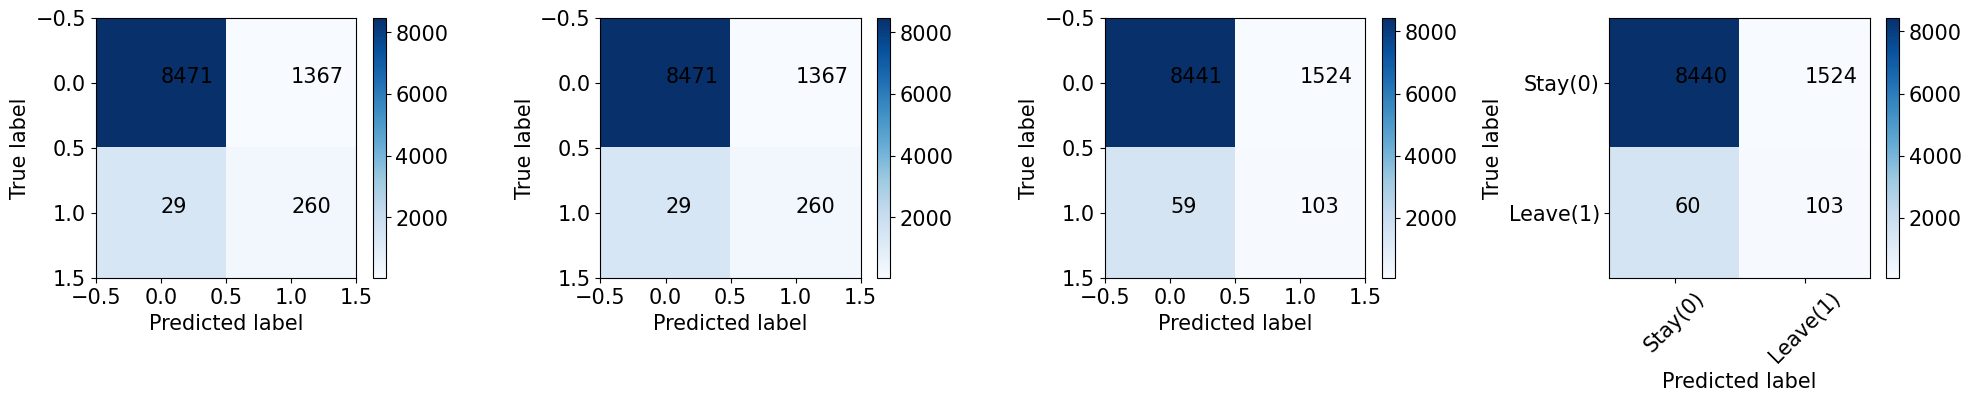

In [246]:
from sklearn.svm import SVR

svr = SVR()
param_grid = {  'C': [  0.15,], 
                'gamma': [0.00005, 0.00015],
                'kernel': ['rbf'] }
svr_model1 = GridSearchCV(svr, param_grid = param_grid, cv = 2, verbose = True)
svr_model2 = GridSearchCV(svr, param_grid = param_grid, cv = 2, verbose = True)
svr_model3 = GridSearchCV(svr, param_grid = param_grid, cv = 2, verbose = True)
svr_model4 = GridSearchCV(svr, param_grid = param_grid, cv = 2, verbose = True)

best_svr1 = svr_model1.fit(X_train1, y_train)
best_svr2 = svr_model2.fit(X_train2, y_train)
best_svr3 = svr_model3.fit(X_train3, y_train)
best_svr4 = svr_model4.fit(X_train4, y_train)
print('SupportVector', "\n", 
                "BestScore: ", best_svr1.best_score_, '\n',
                 "Best parameters: ", best_svr1.best_params_ )


#Print confusion matrix
y_predict_svr1 = svr_model1.predict(X_test1)
y_predict_svr2 = svr_model2.predict(X_test2)
y_predict_svr3 = svr_model3.predict(X_test3)
y_predict_svr4 = svr_model4.predict(X_test4)


#EvaluateModel( ConvertToDiscrete(y_train,ProbCutoff), ConvertToDiscrete(y_predict_svr,ProbCutoff) )  

A = ConvertToDiscrete(y_predict_svr1,ProbCutoff)
B = ConvertToDiscrete(y_predict_svr2,ProbCutoff)
C = ConvertToDiscrete(y_predict_svr3,ProbCutoff)
D = ConvertToDiscrete(y_predict_svr4,ProbCutoff)

EvaluateModel4D( ConvertToDiscrete(y_test,ProbCutoff), [A,B,C,D] )

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
DecisionTree 
 BestScore:  0.09319278155550788 
 Best parameters:  {'ccp_alpha': 0.0, 'criterion': 'poisson', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      8500
         1.0       1.00      0.85      0.92      1627

    accuracy                           0.98     10127
   macro avg       0.99      0.93      0.95     10127
weighted avg       0.98      0.98      0.98     10127
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      85

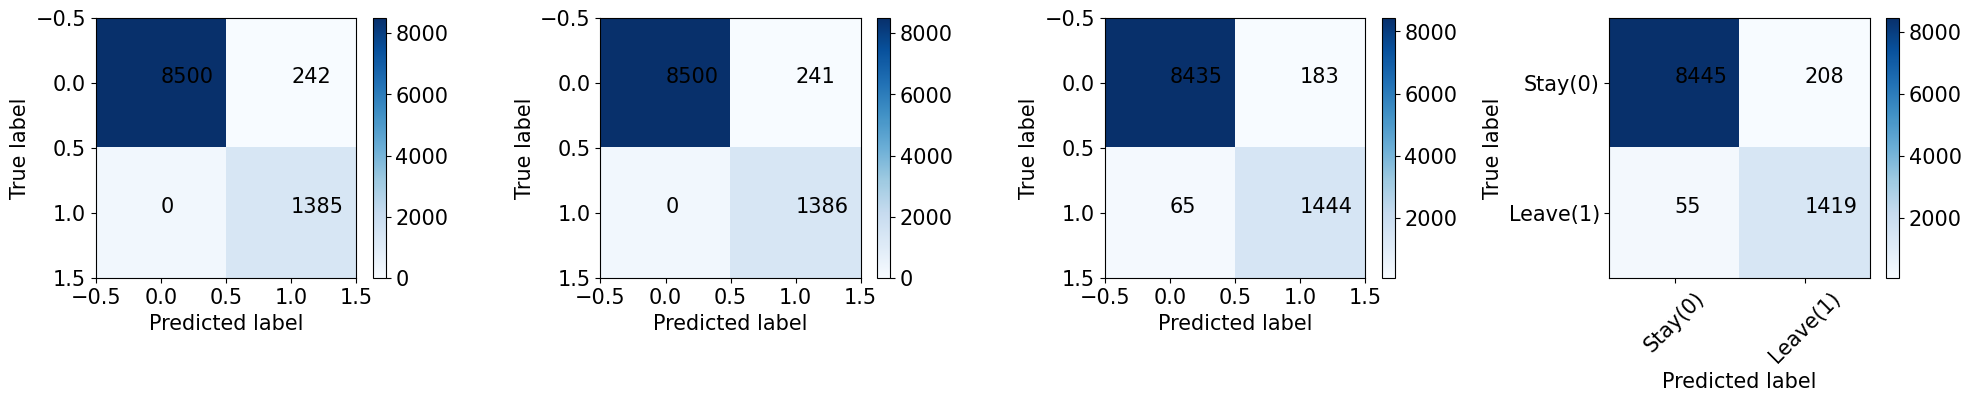

In [247]:
#Using  DecisionTree regression to model the data
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dct = tree.DecisionTreeRegressor()
param_grid = { 'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson" ]
                         , 'splitter':['best'], 'max_depth':[None] , 'min_samples_split':[2], 
              'min_samples_leaf':[1], 'min_weight_fraction_leaf':[0.0], 
             'max_features' : [None], 'random_state': [None], 'max_leaf_nodes': [None], 
              'min_impurity_decrease': [0.0], 'ccp_alpha': [0.0] }
dct_model1 = GridSearchCV(dct, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
dct_model2 = GridSearchCV(dct, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
dct_model3 = GridSearchCV(dct, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
dct_model4 = GridSearchCV(dct, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

best_dct1 = dct_model1.fit(X_train1, y_train)
best_dct2 = dct_model2.fit(X_train2, y_train)
best_dct3 = dct_model3.fit(X_train3, y_train)
best_dct4 = dct_model4.fit(X_train4, y_train)

print('DecisionTree', "\n", 
                "BestScore: ", best_dct1.best_score_, '\n',
                 "Best parameters: ", best_dct1.best_params_ )


#Print confusion matrix
y_predict_dct1 = dct_model1.predict(X_test1)
y_predict_dct2 = dct_model2.predict(X_test2)
y_predict_dct3 = dct_model3.predict(X_test3)
y_predict_dct4 = dct_model4.predict(X_test4)


#EvaluateModel( ConvertToDiscrete(y_train,ProbCutoff), ConvertToDiscrete(y_predict_dct,ProbCutoff) )  

A = ConvertToDiscrete(y_predict_dct1,ProbCutoff)
B = ConvertToDiscrete(y_predict_dct2,ProbCutoff)
C = ConvertToDiscrete(y_predict_dct3,ProbCutoff)
D = ConvertToDiscrete(y_predict_dct4,ProbCutoff)

EvaluateModel4D( ConvertToDiscrete(y_test,ProbCutoff), [A,B,C,D] )

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
RandomForest 
 BestScore:  0.4534008883036475 
 Best parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      8500
         1.0       1.00      0.85      0.92      1627

    accuracy                           0.98     10127
   macro avg       0.99      0.93      0.95     10127
weighted avg       0.98      0.98      0.98     1

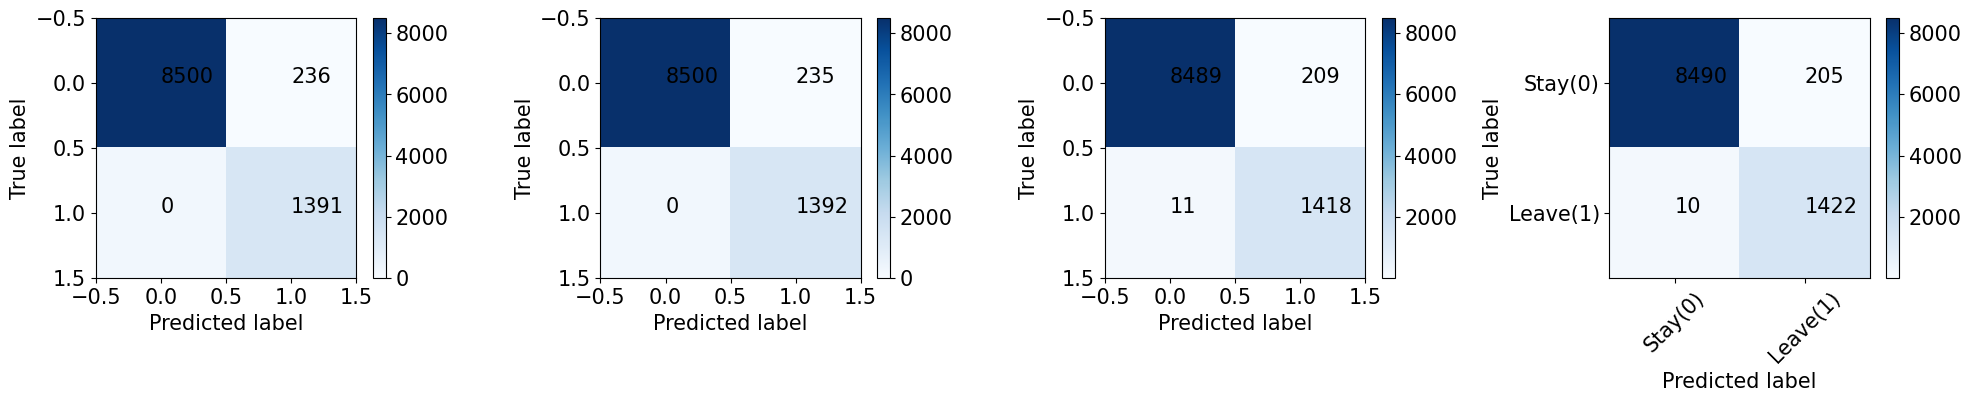

In [248]:
#Using  RandomForest  regression to model the data
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
param_grid = {  'n_estimators':[100], 'criterion':['squared_error'], 'max_depth':[None], 
                'min_samples_split':[2], 'min_samples_leaf':[1], 'min_weight_fraction_leaf':[0.0], 
                'max_features':[1.0], 'max_leaf_nodes':[None], 'min_impurity_decrease':[0.0], 'bootstrap':[True], 
               'oob_score':[False], 'n_jobs':[None], 'random_state':[None], 'verbose':[0], 'warm_start':[False], 
              'ccp_alpha':[0.0], 'max_samples':[None]}
rfr_model1 = GridSearchCV(rfr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
rfr_model2 = GridSearchCV(rfr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
rfr_model3 = GridSearchCV(rfr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
rfr_model4 = GridSearchCV(rfr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

best_rfr1 = rfr_model1.fit(X_train1, y_train)
best_rfr2 = rfr_model2.fit(X_train2, y_train)
best_rfr3 = rfr_model3.fit(X_train3, y_train)
best_rfr4 = rfr_model4.fit(X_train4, y_train)

print('RandomForest', "\n", 
                "BestScore: ", best_rfr1.best_score_, '\n',
                 "Best parameters: ", best_rfr1.best_params_ )


#Print confusion matrix
y_predict_rfr1 = rfr_model1.predict(X_test1)
y_predict_rfr2 = rfr_model2.predict(X_test2)
y_predict_rfr3 = rfr_model3.predict(X_test3)
y_predict_rfr4 = rfr_model4.predict(X_test4)

#EvaluateModel( ConvertToDiscrete(y_train,ProbCutoff), ConvertToDiscrete(y_predict_rfr,ProbCutoff) )  

A = ConvertToDiscrete(y_predict_rfr1,ProbCutoff)
B = ConvertToDiscrete(y_predict_rfr2,ProbCutoff)
C = ConvertToDiscrete(y_predict_rfr3,ProbCutoff)
D = ConvertToDiscrete(y_predict_rfr4,ProbCutoff)

EvaluateModel4D( ConvertToDiscrete(y_test,ProbCutoff), [A,B,C,D] )

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
KNeighbors  
 BestScore:  -0.09327976721376148 
 Best parameters:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      8500
         1.0       0.79      0.56      0.66      1627

    accuracy                           0.91     10127
   macro avg       0.86      0.77      0.80     10127
weighted avg       0.90      0.91      0.90     10127
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      8500
         1.0       0.79      0.56      0.66      1627

    accuracy                           0.91     10127

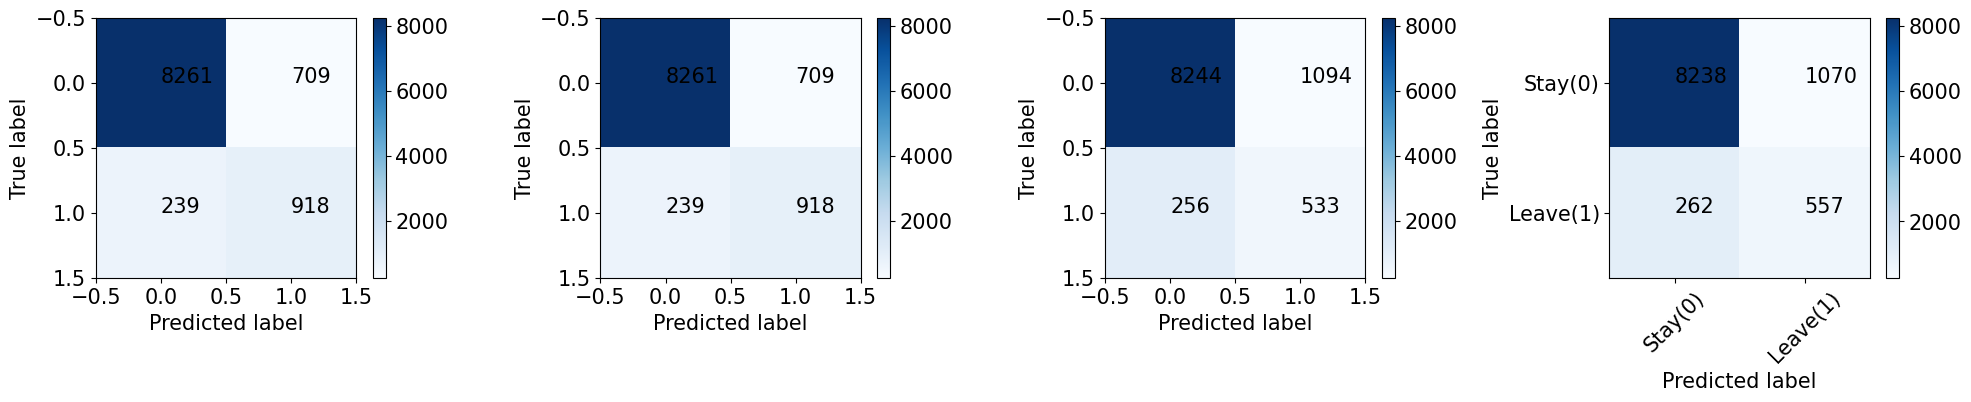

In [249]:
from sklearn.neighbors import KNeighborsRegressor
#knr_model = KNeighborsRegressor(n_neighbors=1)
knr = KNeighborsRegressor()
param_grid = { 'n_neighbors':[ 1,5],  'weights':['uniform'],
              'algorithm':['auto'], 'leaf_size':[30], 'p':[2], 'metric':['minkowski'], 
             'metric_params':[None], 'n_jobs':[None] }
knr_model1 = GridSearchCV(knr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
knr_model2 = GridSearchCV(knr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
knr_model3 = GridSearchCV(knr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
knr_model4 = GridSearchCV(knr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)


best_knr1 = knr_model1.fit(X_train1, y_train)
best_knr2 = knr_model2.fit(X_train2, y_train)
best_knr3 = knr_model3.fit(X_train3, y_train)
best_knr4 = knr_model4.fit(X_train4, y_train)


print('KNeighbors ', "\n", 
                "BestScore: ", best_knr1.best_score_, '\n',
                 "Best parameters: ", best_knr1.best_params_ )

#Print confusion matrix
y_predict_knr1 = best_knr1.predict(X_test1)
y_predict_knr2 = best_knr2.predict(X_test2)
y_predict_knr3 = best_knr3.predict(X_test3)
y_predict_knr4 = best_knr4.predict(X_test4)

#EvaluateModel( ConvertToDiscrete(y_train,ProbCutoff), ConvertToDiscrete(y_predict_best,ProbCutoff) )

A = ConvertToDiscrete(y_predict_knr1,ProbCutoff)
B = ConvertToDiscrete(y_predict_knr2,ProbCutoff)
C = ConvertToDiscrete(y_predict_knr3,ProbCutoff)
D = ConvertToDiscrete(y_predict_knr4,ProbCutoff)

EvaluateModel4D( ConvertToDiscrete(y_test,ProbCutoff), [A,B,C,D] )

In [250]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
best = fmin(fn=lambda x: 10 + x + 4*x*x - 5*x**3 + x**4,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)
print(best)

100%|██████| 100/100 [00:00<00:00, 407.01trial/s, best loss: -5.069997870532518]
{'x': 3.056010511437635}


In [251]:
import warnings
warnings.filterwarnings('ignore')

space={
        'gamma': hp.uniform ('gamma', 0.01,1000),
        'reg_alpha' : hp.quniform('reg_alpha', 0.1,180,10),
        'reg_lambda' : hp.uniform('reg_lambda', 0.1,10),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.15,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1)
        
    }
def hyperparameter_tuning(space):
    model=xgb.XGBRegressor( 
                           gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree'])
    
    evaluation = [( X_train1, y_train), ( X_test1, y_test)]
    
    model.fit(X_train1, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test1)
    mse= mean_squared_error(y_test, pred)
    print ("SCORE:", mse)
    #change the metric if you like
    return {'loss':mse, 'status': STATUS_OK, 'model': model}

trials = Trials()
best_space = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print (best_space)

SCORE:                                                                          
0.13348980628717314                                                             
SCORE:                                                                          
0.13343166891252975                                                             
SCORE:                                                                          
0.11579778950534078                                                             
SCORE:                                                                          
0.13343257258109992                                                             
SCORE:                                                                          
0.1334316550661656                                                              
SCORE:                                                                          
0.13343166891252975                                                             
SCORE:                      

<class 'dict'>
{'colsample_bytree': [0.6719537312421242], 'gamma': [16.14882455638584], 'min_child_weight': [2.0], 'reg_alpha': [30.0], 'reg_lambda': [2.742218074853231]}
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
xGBoost  
 BestScore:  -0.1358647006549968 
 Best parameters:  {'colsample_bytree': 0.6719537312421242, 'gamma': 16.14882455638584, 'min_child_weight': 2.0, 'reg_alpha': 30.0, 'reg_lambda': 2.742218074853231}
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      8500
         1.0       0.89      0.61      0.72      1627

    accuracy                           0.92     10127
   macro avg       0.91      0.80      0.84     10127
weighted avg       0.92      0.92      0.92     10127
               precision    recall  f1-score   support

  

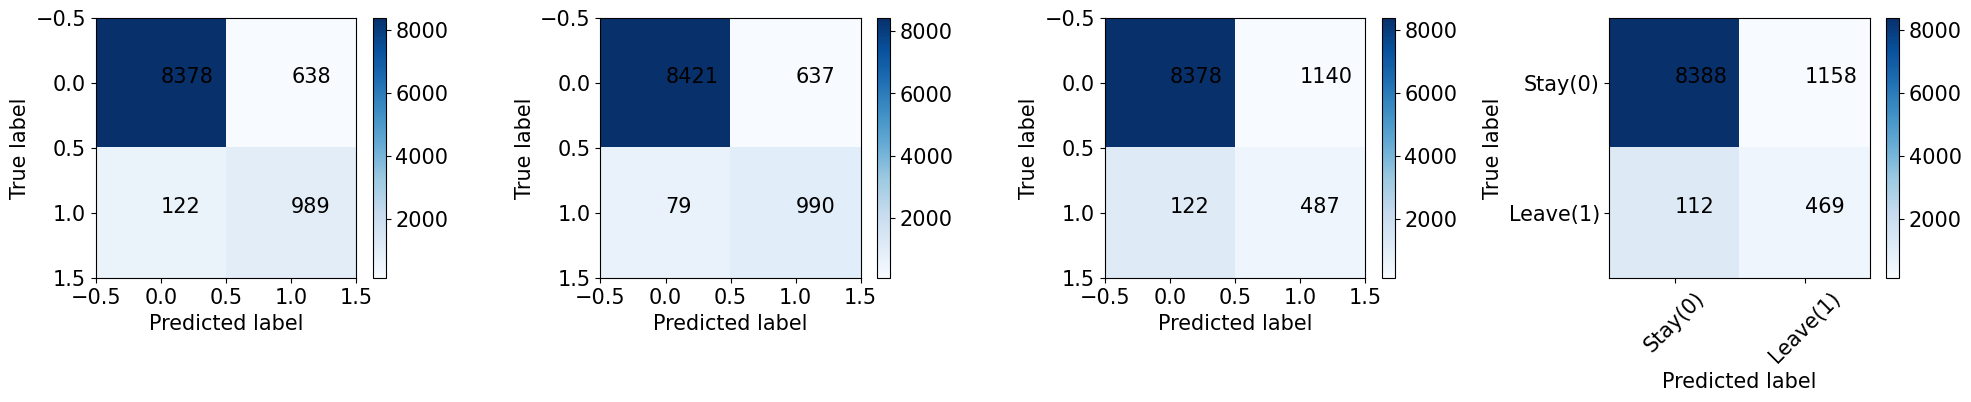

In [252]:
#Using  xGBoost (ExtremeGradientBoost)  Regression to model the data
import xgboost as xgb

xgbr = xgb.XGBRegressor()
param_grid ={}
#param_grid = best_space
for key, value in best_space.items():
    param_grid.update( {key:[value]} )
'''    
param_grid = {'base_score':[0.5], 'booster':['gbtree'],
              'colsample_bylevel':[1],
              'colsample_bytree':[0.6498], 'gamma':[1.004], 'learning_rate':[ 0.03], 'max_delta_step':[0],
              'max_depth':[None], 'min_child_weight':[5],      
             'n_jobs':[1], 'nthread':[None], 'objective':['reg:squarederror'], 'random_state':[0],
             'reg_alpha':[0.2, 0.5, 1], 'reg_lambda':[1], 'scale_pos_weight':[1], 'seed':[0],
               'subsample':[1]
             }
'''
print(type(best_space))
print(param_grid)

xgbr_model1 = GridSearchCV(xgbr, param_grid = param_grid, cv = 4, verbose = True)
xgbr_model2 = GridSearchCV(xgbr, param_grid = param_grid, cv = 4, verbose = True)
xgbr_model3 = GridSearchCV(xgbr, param_grid = param_grid, cv = 4, verbose = True)
xgbr_model4 = GridSearchCV(xgbr, param_grid = param_grid, cv = 4, verbose = True)

best_xgbr1 = xgbr_model1.fit(X_train1, y_train)
best_xgbr2 = xgbr_model2.fit(X_train2, y_train)
best_xgbr3 = xgbr_model3.fit(X_train3, y_train)
best_xgbr4 = xgbr_model4.fit(X_train4, y_train)

print('xGBoost ', "\n", 
                "BestScore: ", best_xgbr1.best_score_, '\n',
                 "Best parameters: ", best_xgbr1.best_params_ )


#Print confusion matrix
y_predict_xgbr1 = xgbr_model1.predict(X_test1)
y_predict_xgbr2 = xgbr_model2.predict(X_test2)
y_predict_xgbr3 = xgbr_model3.predict(X_test3)
y_predict_xgbr4 = xgbr_model4.predict(X_test4)

#EvaluateModel( ConvertToDiscrete(y_train,ProbCutoff), ConvertToDiscrete(y_predict_xgbr,ProbCutoff) )  

A = ConvertToDiscrete(y_predict_xgbr1,ProbCutoff)
B = ConvertToDiscrete(y_predict_xgbr2,ProbCutoff)
C = ConvertToDiscrete(y_predict_xgbr3,ProbCutoff)
D = ConvertToDiscrete(y_predict_xgbr4,ProbCutoff)

EvaluateModel4D( ConvertToDiscrete(y_test,ProbCutoff), [A,B,C,D] )

### Performance of statistical models considered:

LinearRegression = 89% \
DecisionTree = 98% \
RandomForest = 98% \
KNeighbors   = 91% \
SupportVector Reg = 86% \
xGBoost = 91% 

### Within the parameter space explored, DecisionTree and Random Forest performs with an accuracy of 98%. xGBoost performs with an accuracy of 91%.
